In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram,plot_bloch_multivector

import numpy as np
import math
from math import sqrt,pi


In [2]:
q1=QuantumRegister(2)
c1=ClassicalRegister(2)
qc1=QuantumCircuit(q1,c1)

[0.70710678+0.j         0.        -0.70710678j 0.        +0.j
 0.        +0.j        ]


C:\Users\user\Anaconda3\envs\IBMQ\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


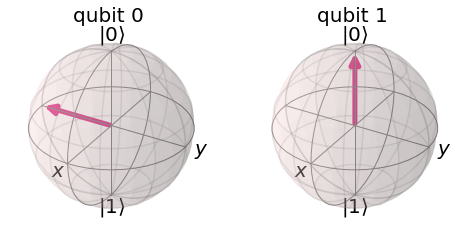

In [5]:
simulator=Aer.get_backend("statevector_simulator")
job=execute(qc1,simulator)
result=job.result()
statevector=result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

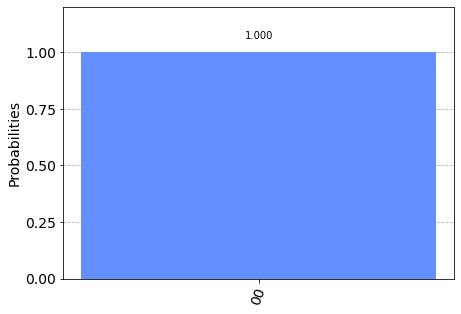

In [7]:
qc1.measure(q1[0],c1)
simulator=Aer.get_backend("qasm_simulator")
job=execute(qc1,simulator,shots=1024)
result=job.result()
counts=result.get_counts()
plot_histogram(counts)

In [8]:
qc1.x(q1[0])
qc1.i(q1[1])

In [9]:
qc1.h(q1[0])

In [4]:
qc1.rx(math.pi/2,q1[0])

In [3]:
q=QuantumRegister(1)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)
initial=[(2**(1/2)+1)/(6**(1/2)),(-(2**(1/2))+1)/(6**(1/2))]
angle=math.asin(initial[1])
qc.u3(2*angle,0,0,q[0])
qc.h(q[0])

C:\Users\user\AppData\Local\Temp/ipykernel_8872/3966525649.py:6: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(2*angle,0,0,q[0])


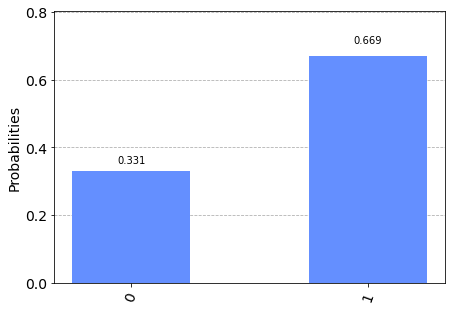

In [7]:
qc.measure(q,c)
sim=Aer.get_backend("qasm_simulator")
job=execute(qc,sim,shots=1024)
result=job.result()
counts=result.get_counts()
plot_histogram(counts)

In [2]:
#P2
q2=QuantumRegister(2)
c2=ClassicalRegister(2)
qc2=QuantumCircuit(q2,c2)


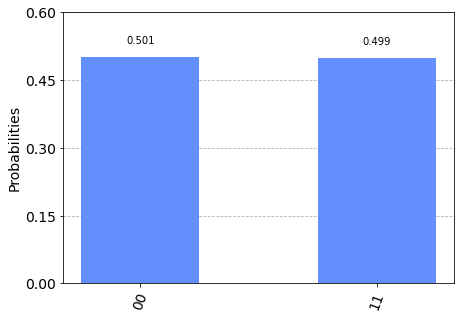

In [4]:
qc2.measure(q2,c2)
sim2=Aer.get_backend("qasm_simulator")
job2=execute(qc2,sim2,shots=1024)
result2=job2.result()
counts2=result2.get_counts()
plot_histogram(counts2)

In [4]:
sim2_2=Aer.get_backend("statevector_simulator")
result2_2=execute(qc2,sim2_2).result()
print(result2_2.get_statevector())


[ 0.        +0.00000000e+00j -0.70710678-8.65956056e-17j
  0.70710678+0.00000000e+00j  0.        +0.00000000e+00j]


In [8]:
#2a
qc2.h(q2[0])
qc2.h(q2[1])
qc2.draw()

┌───┐
q23_0: ┤ H ├
       ├───┤
q23_1: ┤ H ├
       └───┘
 c1: 2/═════

In [3]:
#2b prepare
qc2.h(q2[0])
qc2.cx(q2[0],q2[1])
qc2.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [3]:
#2c
qc2.h(q2[0])
qc2.cx(q2[0],q2[1])
qc2.h(q2[0])
qc2.h(q2[1])
qc2.draw()

┌───┐     ┌───┐
q0_0: ┤ H ├──■──┤ H ├
      └───┘┌─┴─┐├───┤
q0_1: ─────┤ X ├┤ H ├
           └───┘└───┘
c0: 2/═══════════════

In [3]:
#2d1
#prepare psi+
qc2.h(q2[0])
qc2.x(q2[1])
qc2.cx(q2[0],q2[1])
qc2.draw()

┌───┐     
q0_0: ┤ H ├──■──
      ├───┤┌─┴─┐
q0_1: ┤ X ├┤ X ├
      └───┘└───┘
c0: 2/══════════

In [3]:
#2d2 
#prepare phi-
qc2.x(q2[0])
qc2.h(q2[0])
qc2.cx(q2[0],q2[1])
qc2.draw()

┌───┐┌───┐     
q0_0: ┤ X ├┤ H ├──■──
      └───┘└───┘┌─┴─┐
q0_1: ──────────┤ X ├
                └───┘
c0: 2/═══════════════

In [3]:
#2d3
#prepare psi-
qc2.x(q2[0])
qc2.h(q2[0])
qc2.x(q2[1])
qc2.cx(q2[0],q2[1])
qc2.draw()

┌───┐┌───┐     
q0_0: ┤ X ├┤ H ├──■──
      ├───┤└───┘┌─┴─┐
q0_1: ┤ X ├─────┤ X ├
      └───┘     └───┘
c0: 2/═══════════════

In [5]:
qc2.h(q2[0])
qc2.swap(q2[1],q2[0])

In [3]:
qc2.h(q2[0])
qc2.cx(q2[0],q2[1])
qc2.cx(q2[1],q2[0])
qc2.cx(q2[0],q2[1])

In [5]:
#p3a
q3_1=QuantumRegister(1)
c3_1=ClassicalRegister(1)
qc3_1=QuantumCircuit(q3_1,c3_1)
q3_2=QuantumRegister(1)
c3_2=ClassicalRegister(1)
qc3_2=QuantumCircuit(q3_2,c3_2)

In [8]:

sim3_1=Aer.get_backend("statevector_simulator")
job3_1=execute(qc3_1,sim3_1)
result3_1=job3_1.result()
print(result3_1.get_statevector())

[0.70710678+0.j 0.70710678+0.j]


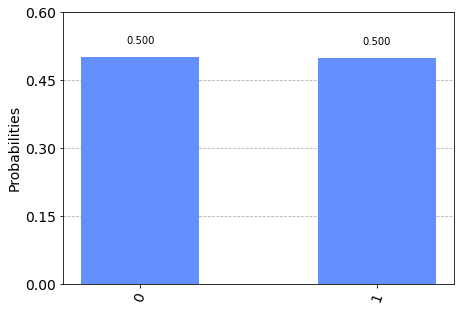

In [10]:
qc3_1.measure(q3_1,c3_1)
sim3_1=Aer.get_backend("qasm_simulator")
job3_1=execute(qc3_1,sim3_1,shots=1025)
result3_1=job3_1.result()
plot_histogram(result3_1.get_counts())

In [9]:
sim3_2=Aer.get_backend("statevector_simulator")
job3_2=execute(qc3_2,sim3_2,shots=1025)
result3_2=job3_2.result()
print(result3_2.get_statevector())

[-1.29893408e-16-0.70710678j -1.29893408e-16-0.70710678j]


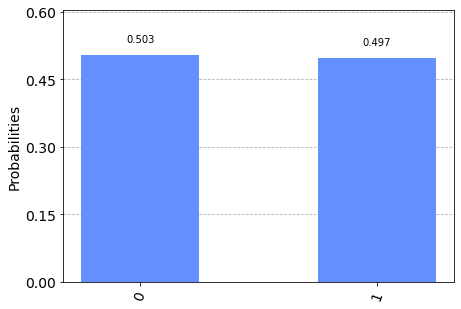

In [11]:
qc3_2.measure(q3_2,c3_2)
sim3_2=Aer.get_backend("qasm_simulator")
job3_2=execute(qc3_2,sim3_2,shots=1025)
result3_2=job3_2.result()
plot_histogram(result3_2.get_counts())

In [6]:
qc3_1.h(q3_1[0])
qc3_1.x(q3_1[0])

qc3_2.h(q3_2[0])
qc3_2.y(q3_2[0])
qc3_2.z(q3_2[0])

In [12]:
#p3b
q3_5=QuantumRegister(1)
c3_5=ClassicalRegister(1)
qc3_5=QuantumCircuit(q3_5,c3_5)
q3_6=QuantumRegister(1)
c3_6=ClassicalRegister(1)
qc3_6=QuantumCircuit(q3_6,c3_6)

In [14]:
qc3_5.h(q3_5[0])

qc3_6.x(q3_6[0])
qc3_6.h(q3_6[0])

In [15]:
sim3_5=Aer.get_backend("statevector_simulator")
job3_5=execute(qc3_5,sim3_5)
result3_5=job3_5.result()
print(result3_5.get_statevector())

[0.70710678+0.j 0.70710678+0.j]


In [16]:
sim3_6=Aer.get_backend("statevector_simulator")
job3_6=execute(qc3_6,sim3_6)
result3_6=job3_6.result()
print(result3_6.get_statevector())

[ 0.70710678+0.00000000e+00j -0.70710678-8.65956056e-17j]


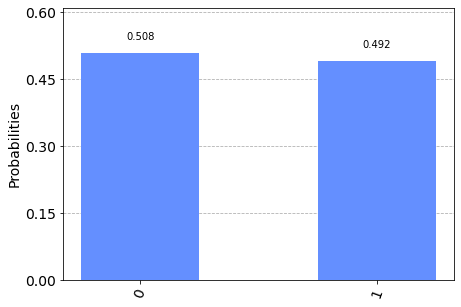

In [17]:
qc3_5.measure(q3_5,c3_5)
sim3_5=Aer.get_backend("qasm_simulator")
job3_5=execute(qc3_5,sim3_5,shots=1025)
result3_5=job3_5.result()
plot_histogram(result3_5.get_counts())

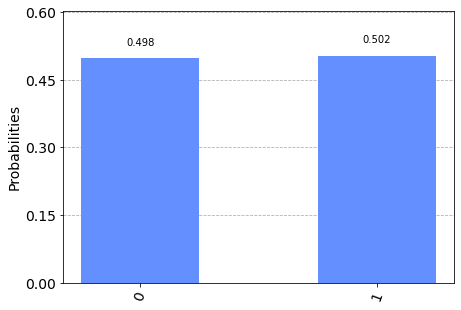

In [18]:
qc3_6.measure(q3_6,c3_6)
sim3_6=Aer.get_backend("qasm_simulator")
job3_6=execute(qc3_6,sim3_6,shots=1025)
result3_6=job3_6.result()
plot_histogram(result3_6.get_counts())

In [2]:
#p3c
q3_3=QuantumRegister(1)
c3_3=ClassicalRegister(1)
qc3_3=QuantumCircuit(q3_3,c3_3)
q3_4=QuantumRegister(1)
c3_4=ClassicalRegister(1)
qc3_4=QuantumCircuit(q3_4,c3_4)

In [5]:
sim3_3=Aer.get_backend("statevector_simulator")
job3_3=execute(qc3_3,sim3_3)
result3_3=job3_3.result()
print(result3_3.get_statevector())

[1.+0.j 0.+0.j]


In [4]:
sim3_4=Aer.get_backend("statevector_simulator")
job3_4=execute(qc3_4,sim3_4)
result3_4=job3_4.result()
print(result3_4.get_statevector())

[-1.8369702e-16-1.j  0.0000000e+00-0.j]


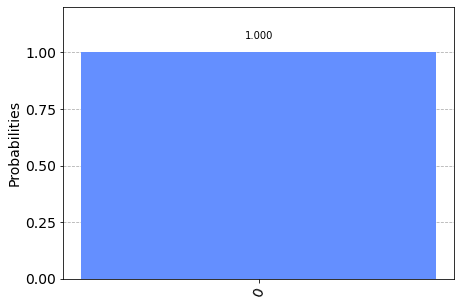

In [6]:
qc3_3.measure(q3_3,c3_3)
sim3_3=Aer.get_backend("qasm_simulator")
job3_3=execute(qc3_3,sim3_3,shots=1025)
result3_3=job3_3.result()
plot_histogram(result3_3.get_counts())

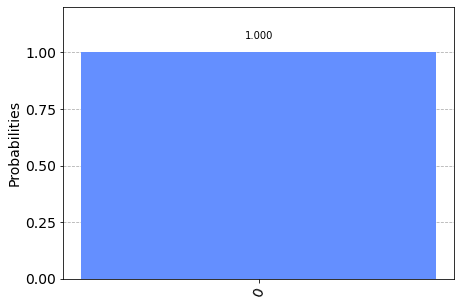

In [7]:
qc3_4.measure(q3_4,c3_4)
sim3_4=Aer.get_backend("qasm_simulator")
job3_4=execute(qc3_4,sim3_4,shots=1025)
result3_4=job3_4.result()
plot_histogram(result3_4.get_counts())

In [3]:
qc3_4.y(q3_4[0])
qc3_4.z(q3_4[0])
qc3_4.x(q3_4[0])

NameError: name 'qc3_4' is not defined

In [2]:
#p4
q4=QuantumRegister(3)
c4=ClassicalRegister(3)
qc4=QuantumCircuit(q4,c4)

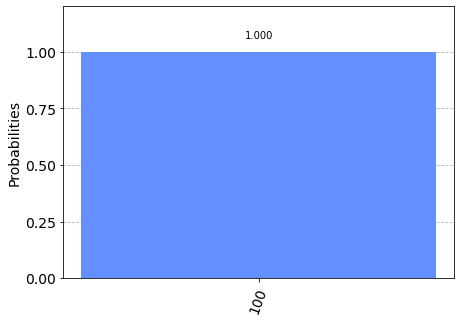

In [4]:
qc4.measure(q4,c4)
sim4=Aer.get_backend("qasm_simulator")
job4=execute(qc4,sim4,shots=1024)
result4=job4.result()
plot_histogram(result4.get_counts())

In [3]:
#different state
qc4.rx(math.pi/6,q4[1])
qc4.h(q4[2])
qc4.cswap(q4[2],q4[1],q4[0])
qc4.h(q4[2])
qc4.x(q4[2])
qc4.draw()


q0_0: ────────────X───────────
      ┌─────────┐ │           
q0_1: ┤ Rx(π/6) ├─X───────────
      └──┬───┬──┘ │ ┌───┐┌───┐
q0_2: ───┤ H ├────■─┤ H ├┤ X ├
         └───┘      └───┘└───┘
c0: 3/════════════════════════

In [3]:
#global phase
qc4.y(q4[0])
qc4.z(q4[0])
qc4.x(q4[0])
qc4.h(q4[2])
qc4.cswap(q4[2],q4[1],q4[0])
qc4.h(q4[2])
qc4.x(q4[2])
qc4.draw()

┌───┐┌───┐┌───┐             
q0_0: ┤ Y ├┤ Z ├┤ X ├─X───────────
      └───┘└───┘└───┘ │           
q0_1: ────────────────X───────────
      ┌───┐           │ ┌───┐┌───┐
q0_2: ┤ H ├───────────■─┤ H ├┤ X ├
      └───┘             └───┘└───┘
c0: 3/════════════════════════════

In [3]:
#orthogonal
qc4.x(q4[0])
qc4.h(q4[0])
qc4.h(q4[1])
qc4.h(q4[2])
qc4.cswap(q4[2],q4[1],q4[0])
qc4.h(q4[2])
qc4.x(q4[2])
qc4.draw()

┌───┐┌───┐             
q0_0: ┤ X ├┤ H ├─X───────────
      ├───┤└───┘ │           
q0_1: ┤ H ├──────X───────────
      ├───┤      │ ┌───┐┌───┐
q0_2: ┤ H ├──────■─┤ H ├┤ X ├
      └───┘        └───┘└───┘
c0: 3/═══════════════════════

In [4]:
#same state
qc4.h(q4[2])
qc4.cswap(q4[2],q4[1],q4[0])
qc4.h(q4[2])
qc4.x(q4[2])
qc4.draw()

q0_0: ───────■────────────
             │            
q0_1: ───────■────────────
      ┌───┐┌─┴─┐┌───┐┌───┐
q0_2: ┤ H ├┤ X ├┤ H ├┤ X ├
      └───┘└───┘└───┘└───┘
c0: 3/════════════════════

In [8]:
sim4_1=Aer.get_backend("statevector_simulator")
job4_1=execute(q4,sim4_1)
result4_1=job4_1.result()
print(result4_1.get_statevector())

AttributeError: 'Qubit' object has no attribute 'name'

In [2]:
#p5
q5=QuantumRegister(5)
c5=ClassicalRegister(5)
qc5=QuantumCircuit(q5,c5)
for i in range(5):
    qc5.h(q5[i])

In [3]:
apitoken="dd361dfa45da932b3db1d5cfa442a0ea978768d7b94b99a9a698298af70582e25ecc0b0967e89b4937ba0ebad239a74bde4ca5e15bbbc2855a11f508f5437756"
IBMQ.save_account(apitoken)

configrc.store_credentials:WARNING:2021-10-08 17:39:34,933: Credentials already present. Set overwrite=True to overwrite.


In [4]:
qc5.measure(q5,c5)

In [5]:
qc5.draw()

┌───┐┌─┐            
q0_0: ┤ H ├┤M├────────────
      ├───┤└╥┘┌─┐         
q0_1: ┤ H ├─╫─┤M├─────────
      ├───┤ ║ └╥┘┌─┐      
q0_2: ┤ H ├─╫──╫─┤M├──────
      ├───┤ ║  ║ └╥┘┌─┐   
q0_3: ┤ H ├─╫──╫──╫─┤M├───
      ├───┤ ║  ║  ║ └╥┘┌─┐
q0_4: ┤ H ├─╫──╫──╫──╫─┤M├
      └───┘ ║  ║  ║  ║ └╥┘
c0: 5/══════╩══╩══╩══╩══╩═
            0  1  2  3  4

In [6]:
IBMQ.load_account()
provider=IBMQ.get_provider(hub="ibm-q",group="open",project="main")
qcomp=provider.get_backend("ibmq_santiago")
job_q=execute(qc5,qcomp,shots=1000)

In [8]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_q)

Job Status: job has successfully run


In [10]:
result5_q=job_q.result()
counts=result5_q.get_counts(qc5)
print(counts)

{'00000': 35, '00001': 33, '10000': 22, '10001': 43, '10010': 21, '10011': 36, '10100': 25, '10101': 26, '10110': 45, '10111': 34, '11000': 19, '11001': 29, '11010': 27, '11011': 33, '11100': 32, '11101': 24, '11110': 24, '11111': 19, '00010': 35, '00011': 26, '00100': 31, '00101': 32, '00110': 44, '00111': 42, '01000': 29, '01001': 30, '01010': 36, '01011': 43, '01100': 25, '01101': 31, '01110': 30, '01111': 39}


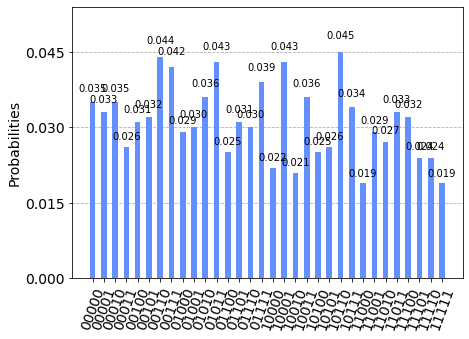

In [11]:
plot_histogram(counts)

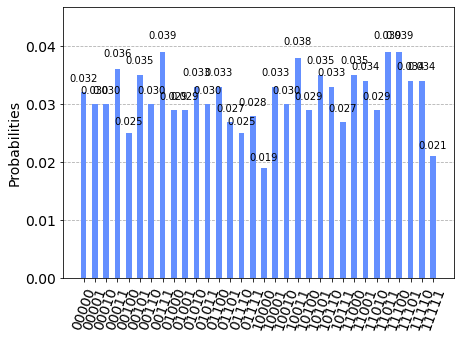

In [12]:
#qc5.measure(q5,c5)
sim5=Aer.get_backend("qasm_simulator")
job5=execute(qc5,sim5,shots=1000)
result5=job5.result()
plot_histogram(result5.get_counts())